In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='whitegrid', palette='Set2', font_scale=1.2)

churn_data = pd.read_csv('https://raw.githubusercontent.com/Donald954732/INST_0060_datastore/main/Churn_Modelling.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking for null data

In [2]:
print('\nNull Values in Training \n{}'.format(churn_data.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(churn_data.isnull().sum()))

print('\nDuplicated values in train {}'.format(churn_data.duplicated().sum()))
print('Duplicated values in test {}'.format(churn_data.duplicated().sum()))


Null Values in Training 
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Null Values in Testing 
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Duplicated values in train 0
Duplicated values in test 0


# Feature Exploration

## Age

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Exited', ylabel='Age'>

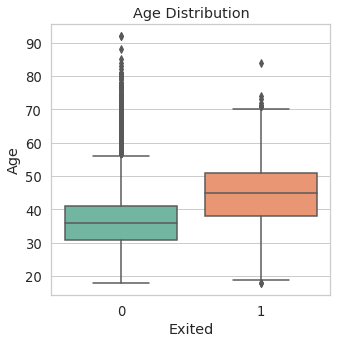

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('Age Distribution')
sns.boxplot(y='Age', x='Exited', data=churn_data, ax=ax)


## Country

<AxesSubplot:title={'center':'Country Distribution'}, xlabel='Geography', ylabel='count'>

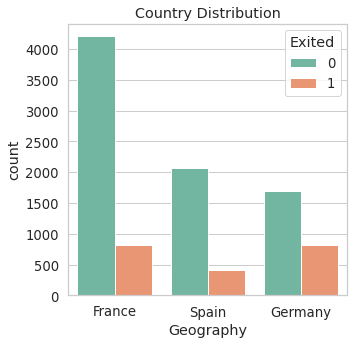

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('Country Distribution')
sns.countplot(x='Geography',hue = 'Exited', data=churn_data, ax=ax)

## Gender

<AxesSubplot:title={'center':'Country Distribution'}, xlabel='Geography', ylabel='count'>

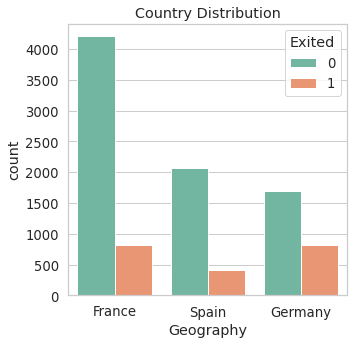

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('Country Distribution')
sns.countplot(x='Geography', hue = 'Exited', data=churn_data, ax=ax)

## Tenure
Number of years for which the customer has been with the bank

<AxesSubplot:title={'center':'Tenure Distribution'}, xlabel='Exited', ylabel='Tenure'>

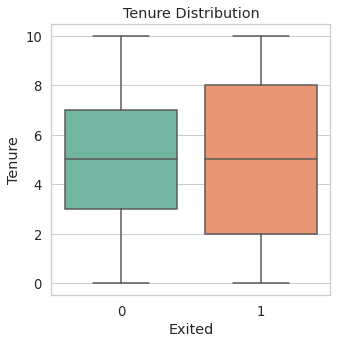

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('Tenure Distribution')
sns.boxplot(y='Tenure', x='Exited', data=churn_data, ax=ax)

## NumOfProducts
Number of bank products the customer is utilising

<AxesSubplot:title={'center':'NumOfProducts Distribution'}, xlabel='NumOfProducts', ylabel='count'>

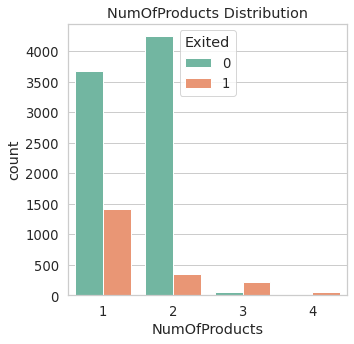

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('NumOfProducts Distribution')
sns.countplot(x='NumOfProducts', hue = 'Exited', data=churn_data, ax=ax)

## HasCrCard
Binary Flag for whether the customer holds a credit card with the bank or not

<AxesSubplot:title={'center':'HasCrCard Distribution'}, xlabel='HasCrCard', ylabel='count'>

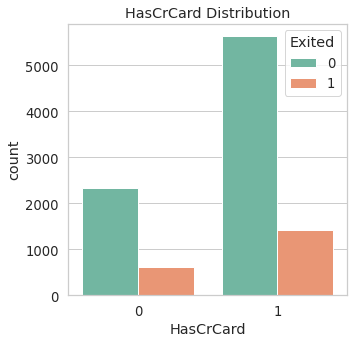

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('HasCrCard Distribution')
sns.countplot(x='HasCrCard', hue = 'Exited', data=churn_data, ax=ax)

## IsActiveMember
Binary Flag for whether the customer is an active member with the bank or not

<AxesSubplot:title={'center':'HasCrCard Distribution'}, xlabel='IsActiveMember', ylabel='count'>

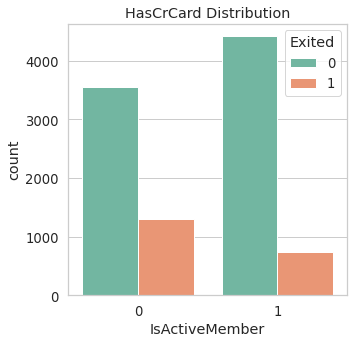

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('HasCrCard Distribution')
sns.countplot(x='IsActiveMember', hue = 'Exited', data=churn_data, ax=ax)

## EstimatedSalary
Estimated salary of the customer in Dollars

<AxesSubplot:title={'center':'EstimatedSalary Distribution'}, xlabel='Exited', ylabel='EstimatedSalary'>

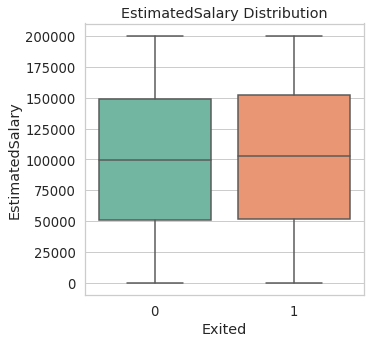

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('EstimatedSalary Distribution')
sns.boxplot(y='EstimatedSalary', x='Exited', data=churn_data, ax=ax)

## Balance
Bank balance of the customer

<AxesSubplot:title={'center':'Balance Distribution'}, xlabel='Exited', ylabel='Balance'>

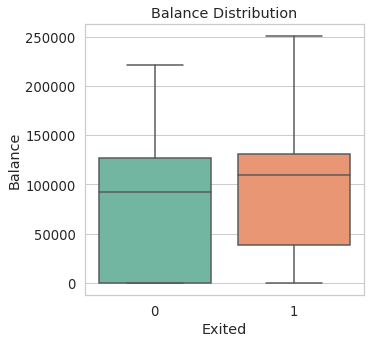

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('Balance Distribution')
sns.boxplot(y='Balance', x='Exited', data=churn_data, ax=ax)

## EstimatedSalary
Estimated salary of the customer in Dollars

<AxesSubplot:title={'center':'EstimatedSalary Distribution'}, xlabel='Exited', ylabel='EstimatedSalary'>

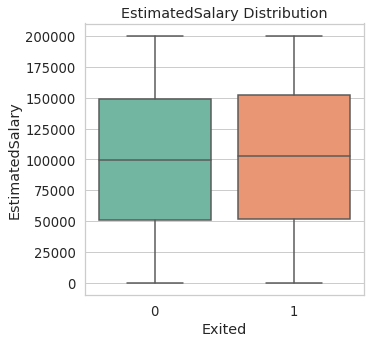

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_title('EstimatedSalary Distribution')
sns.boxplot(y='EstimatedSalary', x='Exited', data=churn_data, ax=ax)

# Data to One Hot Vector 
(for all with word label)

https://www.kaggle.com/kmalit/bank-customer-churn-prediction

In [13]:
word_label = ['Geography', 'Gender']
removing = []
for column in word_label:
    if(churn_data[column].dtype == np.str or churn_data[column].dtype == np.object):
        for cat in churn_data[column].unique():
            churn_data[column+'_'+cat] = np.where(churn_data[column] == cat, 1, 0)
        removing.append(column)
churn_data = churn_data.drop(removing, axis = 1)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


# Normalization

Scaling is not necessary for random forests.

The nature of RF is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important. Because of this, you don't need to transform variables to a common scale like you might with a NN.

You're don't get any analogue of a regression coefficient, which measures the relationship between each predictor variable and the response. Because of this, you also don't need to consider how to interpret such coefficients which is something that is affected by variable measurement scales.

In [14]:
""" need_normalization = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
minimum = churn_data[need_normalization].min().copy()
maximum = churn_data[need_normalization].max().copy()
churn_data[need_normalization] = (churn_data[need_normalization]-minimum)/(maximum-minimum)
churn_data.head() """

" need_normalization = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']\nminimum = churn_data[need_normalization].min().copy()\nmaximum = churn_data[need_normalization].max().copy()\nchurn_data[need_normalization] = (churn_data[need_normalization]-minimum)/(maximum-minimum)\nchurn_data.head() "

In [15]:
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


# Correlation
Exit related with age, gender, member, country, balance, 
balance has strong correlation with country and number of prodct

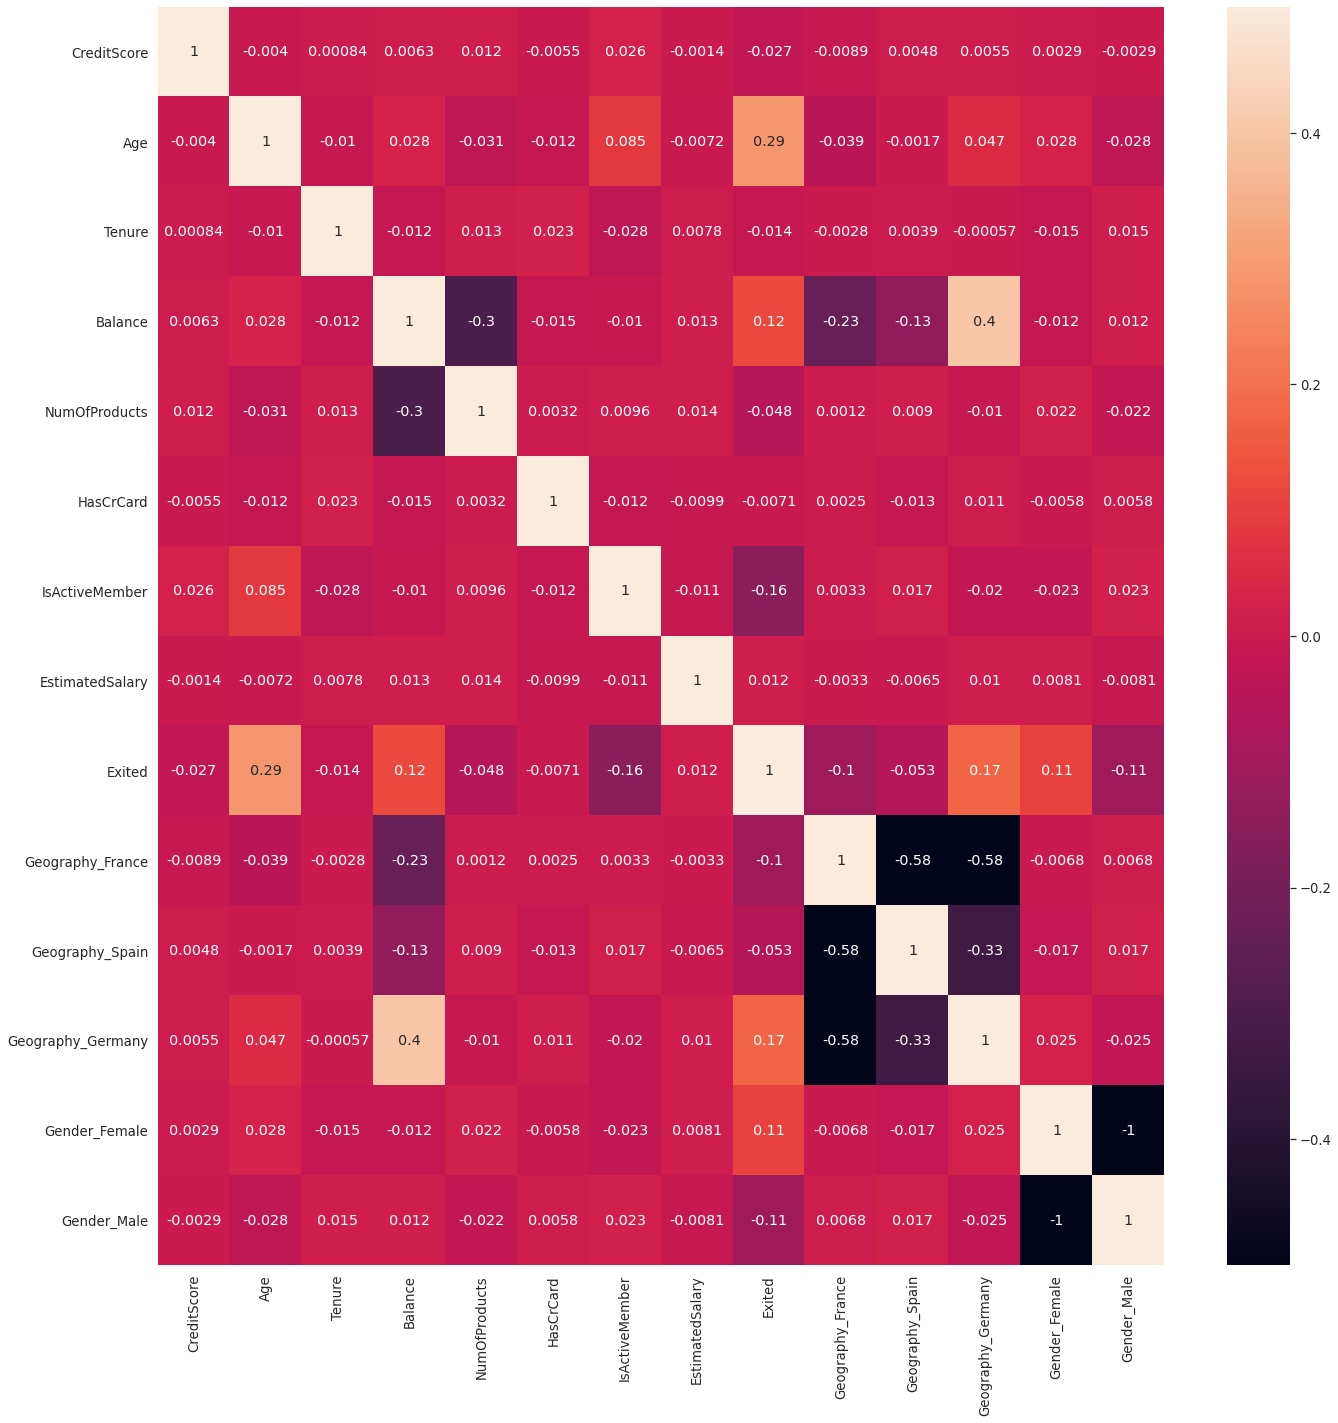

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(churn_data.corr(), annot=True, vmax=0.5, vmin=-0.5)
plt.tight_layout()

# Removing columm

In [17]:
churn_data_x = churn_data.drop(['Exited'], axis=1)
churn_data_x.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,0


In [18]:
churn_data_y = churn_data['Exited']
churn_data_y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(churn_data_x, churn_data_y, test_size=0.33)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(6700, 13) (3300, 13)
(6700,) (3300,)


# Building Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_Classifier = RandomForestClassifier(n_estimators=10)

rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

   Accuracy: 0.8527272727272728
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2617
           1       0.77      0.41      0.53       683

    accuracy                           0.85      3300
   macro avg       0.82      0.69      0.72      3300
weighted avg       0.84      0.85      0.83      3300

[[2536   81]
 [ 405  278]]


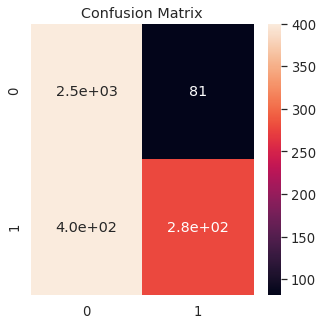

In [21]:
from sklearn import metrics
y_pred = rf_Classifier.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, vmax=400)
plt.title('Confusion Matrix')
plt.show()

In [24]:
rdmf_score = rf_Classifier.score(X_test, y_test)
rdmf_score_tr = rf_Classifier.score(X_train, y_train)
print(rdmf_score)
print(rdmf_score_tr)

0.8527272727272728
0.9828358208955223


# Importance of a feature

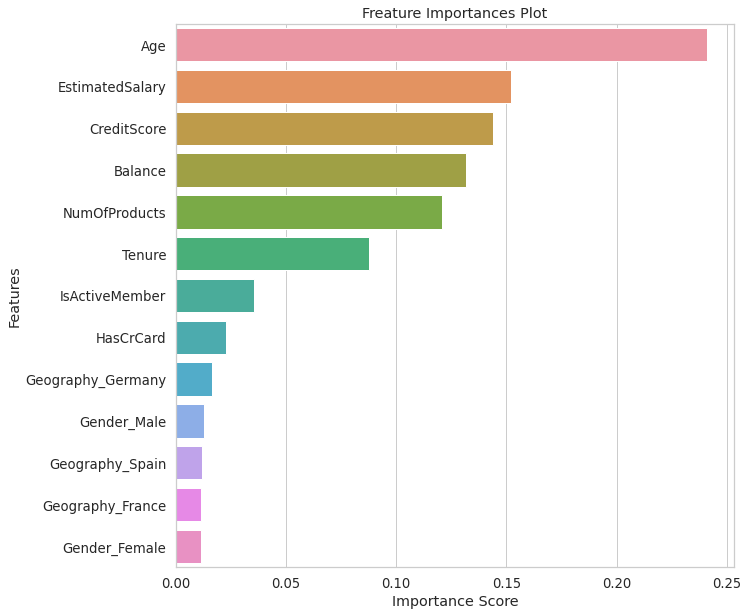

In [22]:
importance = pd.Series(rf_Classifier.feature_importances_, index=churn_data_x.columns).sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x=importance, y=importance.index)
# Add labels to your graph
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title("Freature Importances Plot")
plt.show()

# Regularization

## n_estimators
more trees the less likely the algorithm is to overfit. The lower this number, the closer the model is to a decision tree, with a restricted feature set. (random forest is a reguarization method)


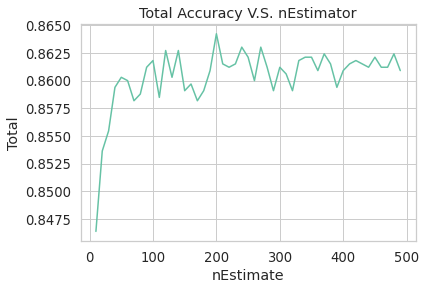

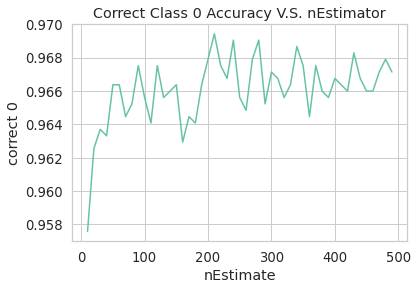

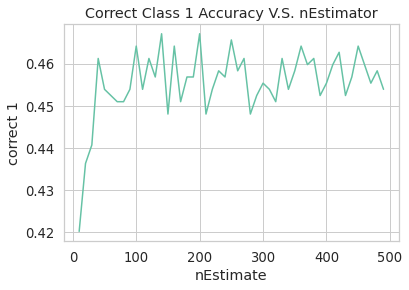

In [68]:
accuracy = pd.DataFrame(columns=['nEstimate', 'Total', 'correct 0', 'correct 1'])
for n_est in range(10, 500, 10):
    rf_Classifier = RandomForestClassifier(n_estimators=n_est)
    rf_Classifier.fit(X_train, y_train)
    y_pred = rf_Classifier.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    total = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][1]+conf_matrix[1][0])
    correct_0 = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
    correct_1 = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])
    #print([total, correct_0, correct_1])
    #accuracy_current = pd.DataFrame([total, correct_0, correct_1], columns=['Total', 'correct 0', 'correct 1'])
    accuracy = accuracy.append({"nEstimate":n_est, "Total":total, 'correct 0': correct_0, 'correct 1': correct_1}, ignore_index=True)
accuracy
sns.lineplot(data=accuracy, x="nEstimate", y="Total").set_title('Total Accuracy V.S. nEstimator')
plt.show()
sns.lineplot(data=accuracy, x="nEstimate", y="correct 0").set_title('Correct Class 0 Accuracy V.S. nEstimator')
plt.show()
sns.lineplot(data=accuracy, x="nEstimate", y="correct 1").set_title('Correct Class 1 Accuracy V.S. nEstimator')
plt.show()

## max_features
how many features each tree is randomly assigned. The smaller, the less likely to overfit, but too small will start to introduce under fitting.

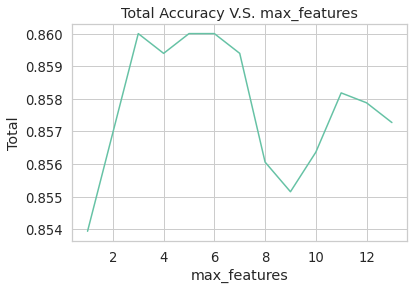

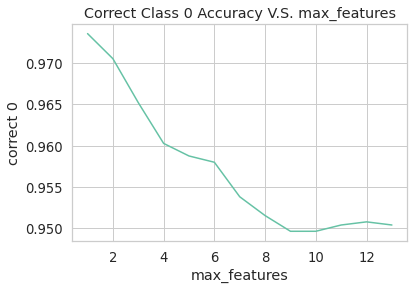

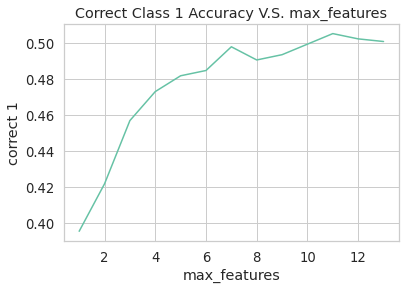

In [69]:
accuracy = pd.DataFrame(columns=['max_features', 'Total', 'correct 0', 'correct 1'])
for x in range(13, 0, -1):
    rf_Classifier = RandomForestClassifier(max_features=x)
    rf_Classifier.fit(X_train, y_train)
    y_pred = rf_Classifier.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    total = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][1]+conf_matrix[1][0])
    correct_0 = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
    correct_1 = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])
    #print([total, correct_0, correct_1])
    #accuracy_current = pd.DataFrame([total, correct_0, correct_1], columns=['Total', 'correct 0', 'correct 1'])
    accuracy = accuracy.append({"max_features":x, "Total":total, 'correct 0': correct_0, 'correct 1': correct_1}, ignore_index=True)
accuracy
sns.lineplot(data=accuracy, x="max_features", y="Total").set_title('Total Accuracy V.S. max_features')
plt.show()
sns.lineplot(data=accuracy, x="max_features", y="correct 0").set_title('Correct Class 0 Accuracy V.S. max_features')
plt.show()
sns.lineplot(data=accuracy, x="max_features", y="correct 1").set_title('Correct Class 1 Accuracy V.S. max_features')
plt.show()

## max_depth: 
This will reduce the complexity of the learned models, lowering over fitting risk. Try starting small, say 5-10, and increasing you get the best result.

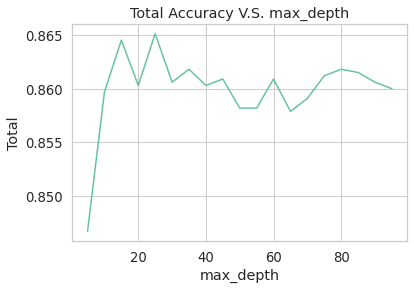

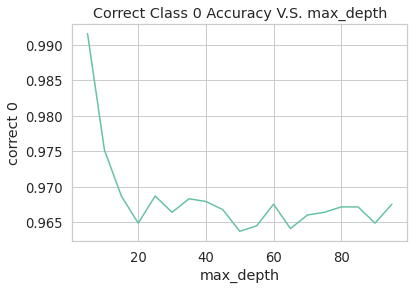

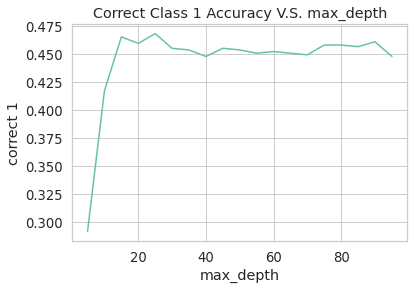

In [70]:
accuracy = pd.DataFrame(columns=['max_depth', 'Total', 'correct 0', 'correct 1'])
for x in range(5, 100, 5):
    rf_Classifier = RandomForestClassifier(max_depth=x)
    rf_Classifier.fit(X_train, y_train)
    y_pred = rf_Classifier.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    total = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][1]+conf_matrix[1][0])
    correct_0 = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
    correct_1 = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])
    #print([total, correct_0, correct_1])
    #accuracy_current = pd.DataFrame([total, correct_0, correct_1], columns=['Total', 'correct 0', 'correct 1'])
    accuracy = accuracy.append({"max_depth":x, "Total":total, 'correct 0': correct_0, 'correct 1': correct_1}, ignore_index=True)
accuracy
sns.lineplot(data=accuracy, x="max_depth", y="Total").set_title('Total Accuracy V.S. max_depth')
plt.show()
sns.lineplot(data=accuracy, x="max_depth", y="correct 0").set_title('Correct Class 0 Accuracy V.S. max_depth')
plt.show()
sns.lineplot(data=accuracy, x="max_depth", y="correct 1").set_title('Correct Class 1 Accuracy V.S. max_depth')
plt.show()

## min_samples_leaf: 
This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.


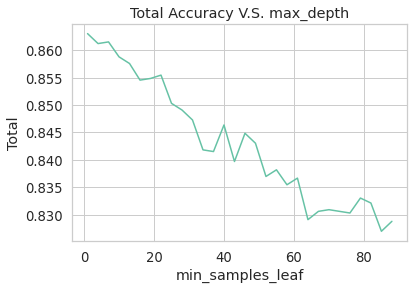

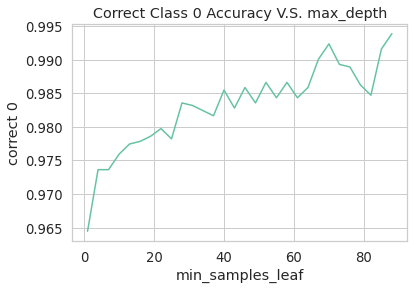

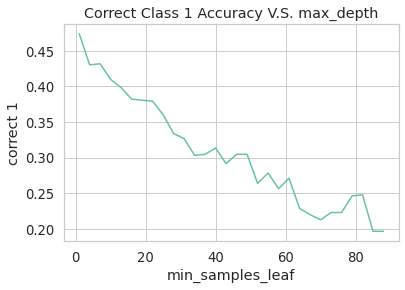

In [72]:
accuracy = pd.DataFrame(columns=['min_samples_leaf', 'Total', 'correct 0', 'correct 1'])
for x in range(1, 90,3):
    rf_Classifier = RandomForestClassifier(min_samples_leaf=x)
    rf_Classifier.fit(X_train, y_train)
    y_pred = rf_Classifier.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    total = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][1]+conf_matrix[1][0])
    correct_0 = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
    correct_1 = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])
    #print([total, correct_0, correct_1])
    #accuracy_current = pd.DataFrame([total, correct_0, correct_1], columns=['Total', 'correct 0', 'correct 1'])
    accuracy = accuracy.append({"min_samples_leaf":x, "Total":total, 'correct 0': correct_0, 'correct 1': correct_1}, ignore_index=True)
accuracy
sns.lineplot(data=accuracy, x="min_samples_leaf", y="Total").set_title('Total Accuracy V.S. max_depth')
plt.show()
sns.lineplot(data=accuracy, x="min_samples_leaf", y="correct 0").set_title('Correct Class 0 Accuracy V.S. max_depth')
plt.show()
sns.lineplot(data=accuracy, x="min_samples_leaf", y="correct 1").set_title('Correct Class 1 Accuracy V.S. max_depth')
plt.show()